In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car = pd.read_csv('../data/cleaned_car_price.csv')

In [21]:
car[car['Manufacturer'] == 'DODGE']

ID  Price  Levy Manufacturer         Model  Prod. year  \
543    45791030  25089   896        DODGE    Challenger        2012   
638    45806621   1882  1399        DODGE       Journey        2010   
750    44677324  16308   896        DODGE  Dart Limited        2013   
910    45797949  18189   900        DODGE   Dart GT 2.4        2015   
915    45813829   3058  1083        DODGE    Challenger        2013   
...         ...    ...   ...          ...           ...         ...   
15536  45771137  11604  1760        DODGE    Challenger        2017   
16278  45770567   8154  1095        DODGE       Caliber        2008   
16736  45755529   1646   707        DODGE       Caliber        2011   
16744  45771556   9565  2377        DODGE    Ramcharger        2016   
17160  44571028   8781   896        DODGE       Caliber        2008   

        Category Leather interior Fuel type  Engine volume  Mileage  \
543        Coupe               No    Petrol            3.6   112000   
638         Jeep              Yes    Petrol            3.5   243477   
750        Sedan              Yes    Petrol            1.4   180000   
910        Sedan              Yes    Petrol            2.4    48000   
915        Coupe              Yes    Petrol            3.6   232853   
...          ...              ...       ...            ...      ...   
15536      Sedan              Yes    Petrol            3.6   240680   
16278  Hatchback               No    Petrol            2.0   154000   
16736  Hatchback              Yes    Petrol            2.0   168166   
16744      Sedan              Yes    Petrol            5.7    39013   
17160  Hatchback               No    Petrol            2.4        0   

       Cylinders Gear box type Drive wheels  Doors       Wheel   Color  \
543          6.0     Tiptronic         Rear      2  Left wheel    Grey   
638          6.0     Automatic        Front      4  Left wheel    Blue   
750          4.0        Manual        Front      4  Left wheel   Black   
910          4.0     Automatic        Front      4  Left wheel   White   
915          6.0     Automatic         Rear      2  Left wheel   Black   
...          ...           ...          ...    ...         ...     ...   
15536        6.0     Automatic         Rear      4  Left wheel    Grey   
16278        4.0     Automatic        Front      4  Left wheel   White   
16736        4.0     Automatic        Front      4  Left wheel  Orange   
16744        8.0     Automatic         Rear      4  Left wheel   Black   
17160        4.0     Automatic        Front      4  Left wheel    Blue   

       Airbags  Turbo  
543          6      0  
638         12      0  
750         12      1  
910          4      0  
915         12      0  
...        ...    ...  
15536       12      0  
16278        4      0  
16736       12      0  
16744       12      0  
17160        4      0  

[85 rows x 19 columns]

In [20]:
car['Model'].value_counts()

Sonata          987
Prius           900
Elantra         871
Camry           784
Santa FE        517
               ... 
FIT RS            1
500 s             1
325 CI            1
Move              1
Prius C aqua      1
Name: Model, Length: 1530, dtype: int64

## Exploratory Data Analysis

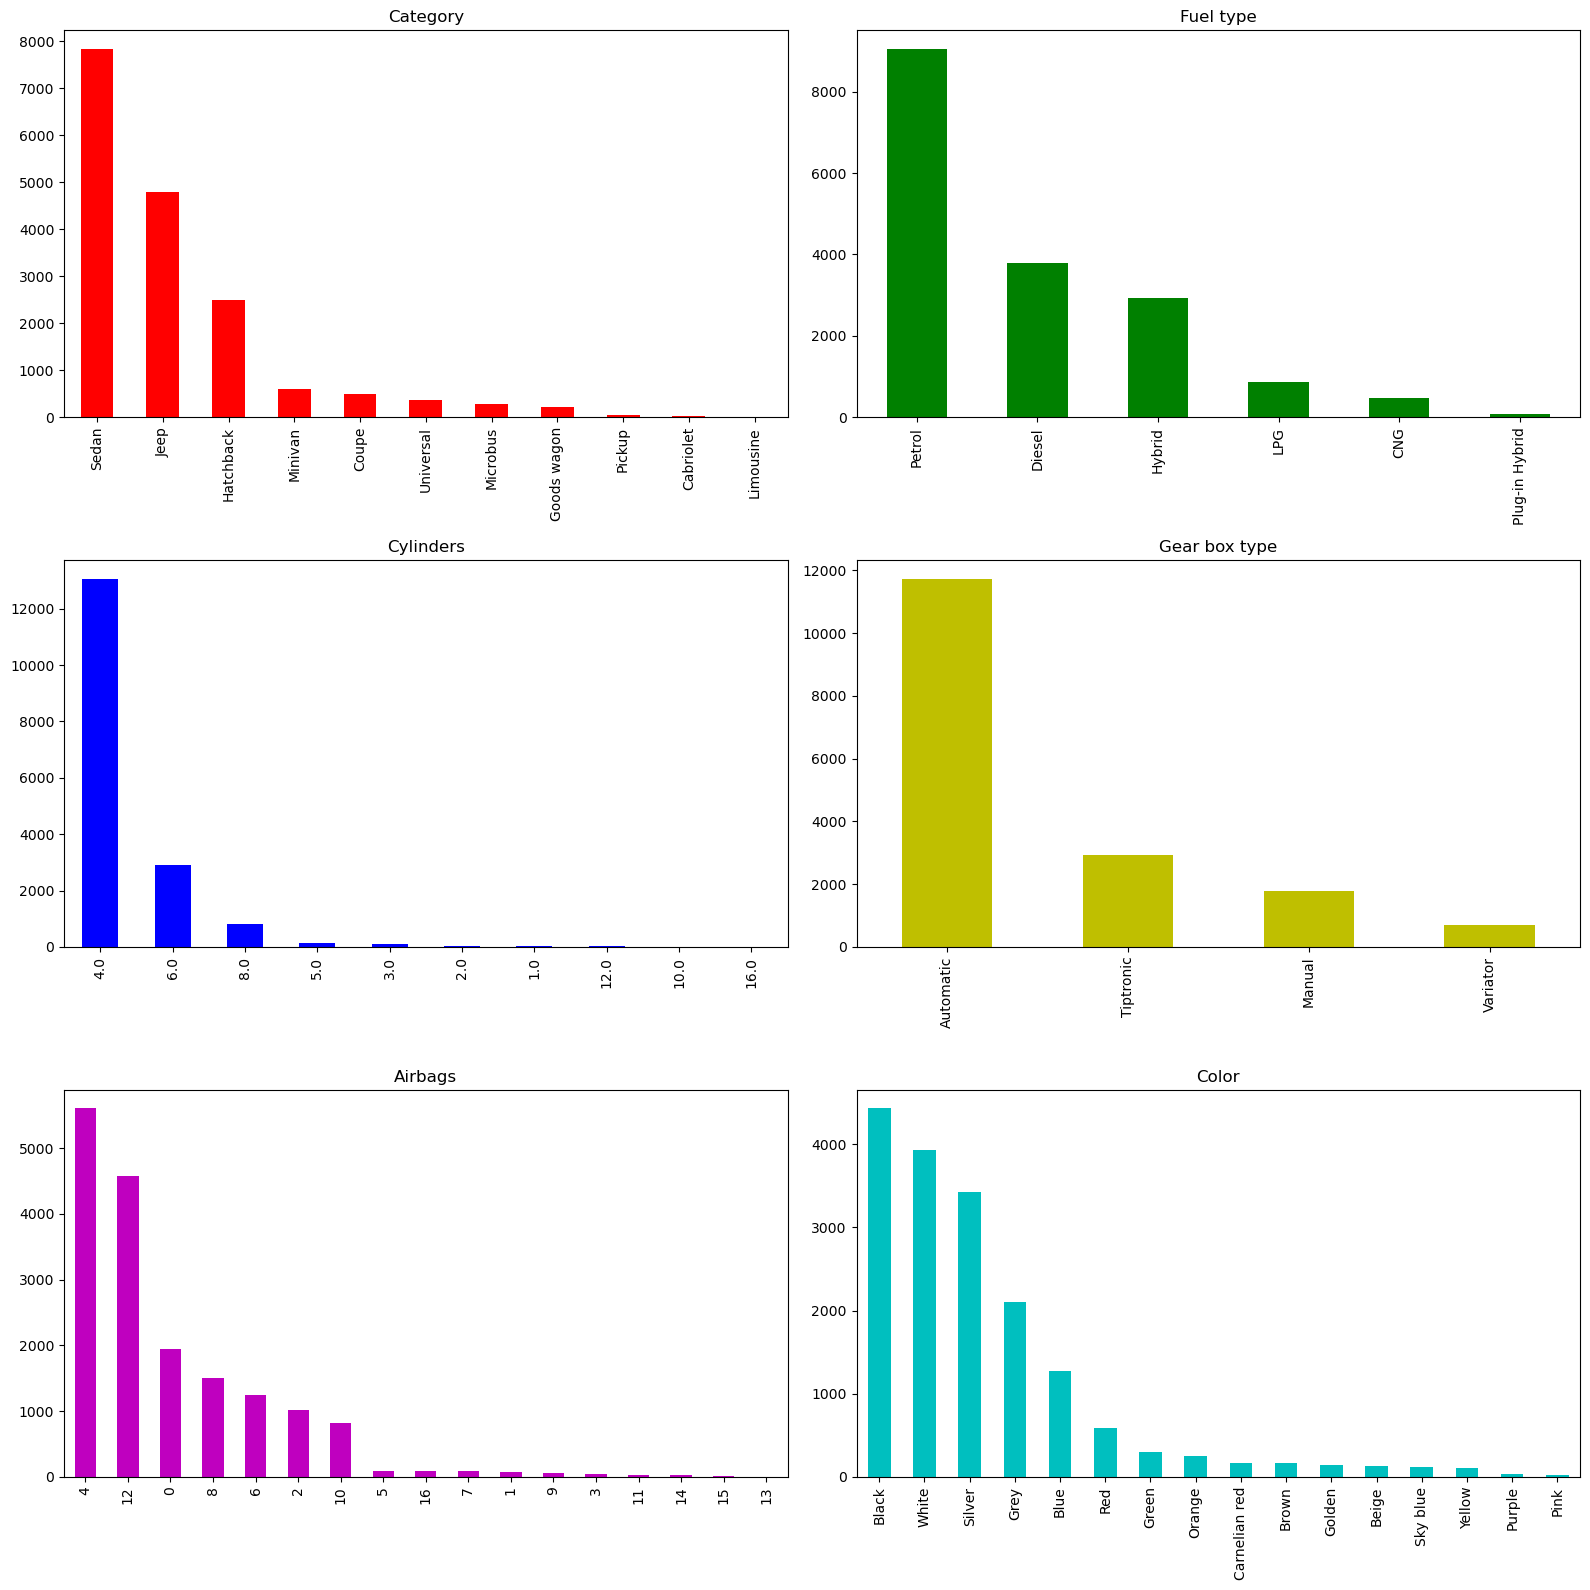

In [3]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (16,16))
columns = ['Category', 'Fuel type', 'Cylinders', 'Gear box type', 'Airbags', 'Color']
colors = ['r', 'g', 'b', 'y', 'm', 'c']

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    car[column].value_counts().plot(kind = 'bar', ax = axs[row,col], color = colors[i % len(colors)])
    axs[row,col].set_title(column)
    
plt.tight_layout()
plt.show()

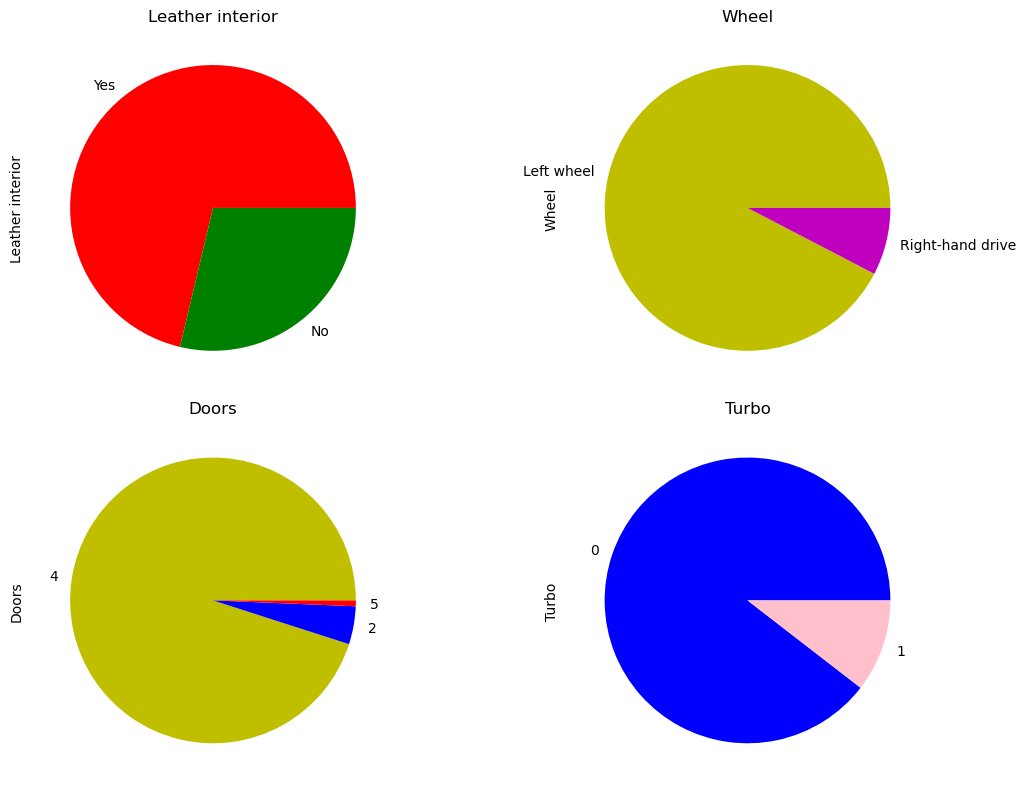

In [4]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
columns = ['Leather interior', 'Wheel', 'Doors', 'Turbo']
colors = [['r', 'g', 'b'],[ 'y', 'm', 'c'],['y', 'b', 'r'],['b', 'pink', 'g']]

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    car[column].value_counts().plot(kind = 'pie', ax = axs[row,col], colors = colors[i])
    axs[row,col].set_title(column)
    
plt.tight_layout()
plt.show()

<AxesSubplot:>

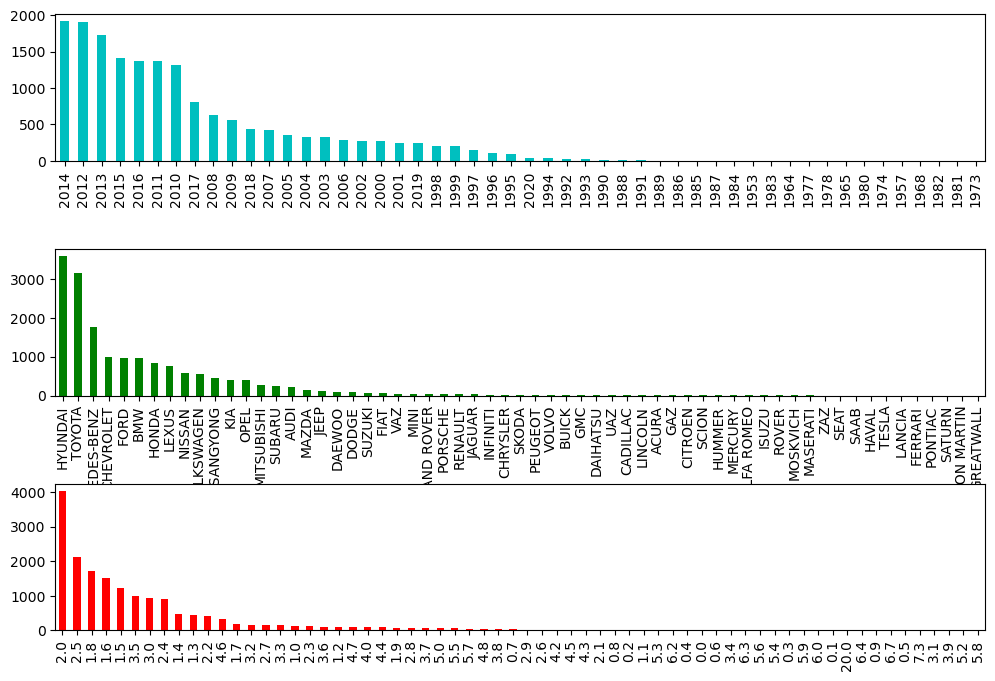

In [5]:
fig, axs = plt.subplots(nrows = 3, figsize = (12,8))
plt.subplots_adjust(hspace = 0.6)
car['Prod. year'].value_counts().plot(kind = 'bar', color = 'c', ax = axs[0])
car['Manufacturer'].value_counts().plot(kind = 'bar', color = 'g', ax = axs[1])
car['Engine volume'].value_counts().plot(kind = 'bar', color = 'r', ax = axs[2])


In [6]:
def distPlot(column,r,c,colr):
    sns.distplot(car[column], ax = axs[r,c], color = colr)

def boxPlot(column,r,c,colr):
    sns.boxplot(car[column], ax = axs[r,c], color = colr)
    
def histPlot(column,r,c,colr):
    sns.histplot(np.log(car[column]), ax = axs[r,c], color = colr)


C:\Users\Golden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Golden\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Golden\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


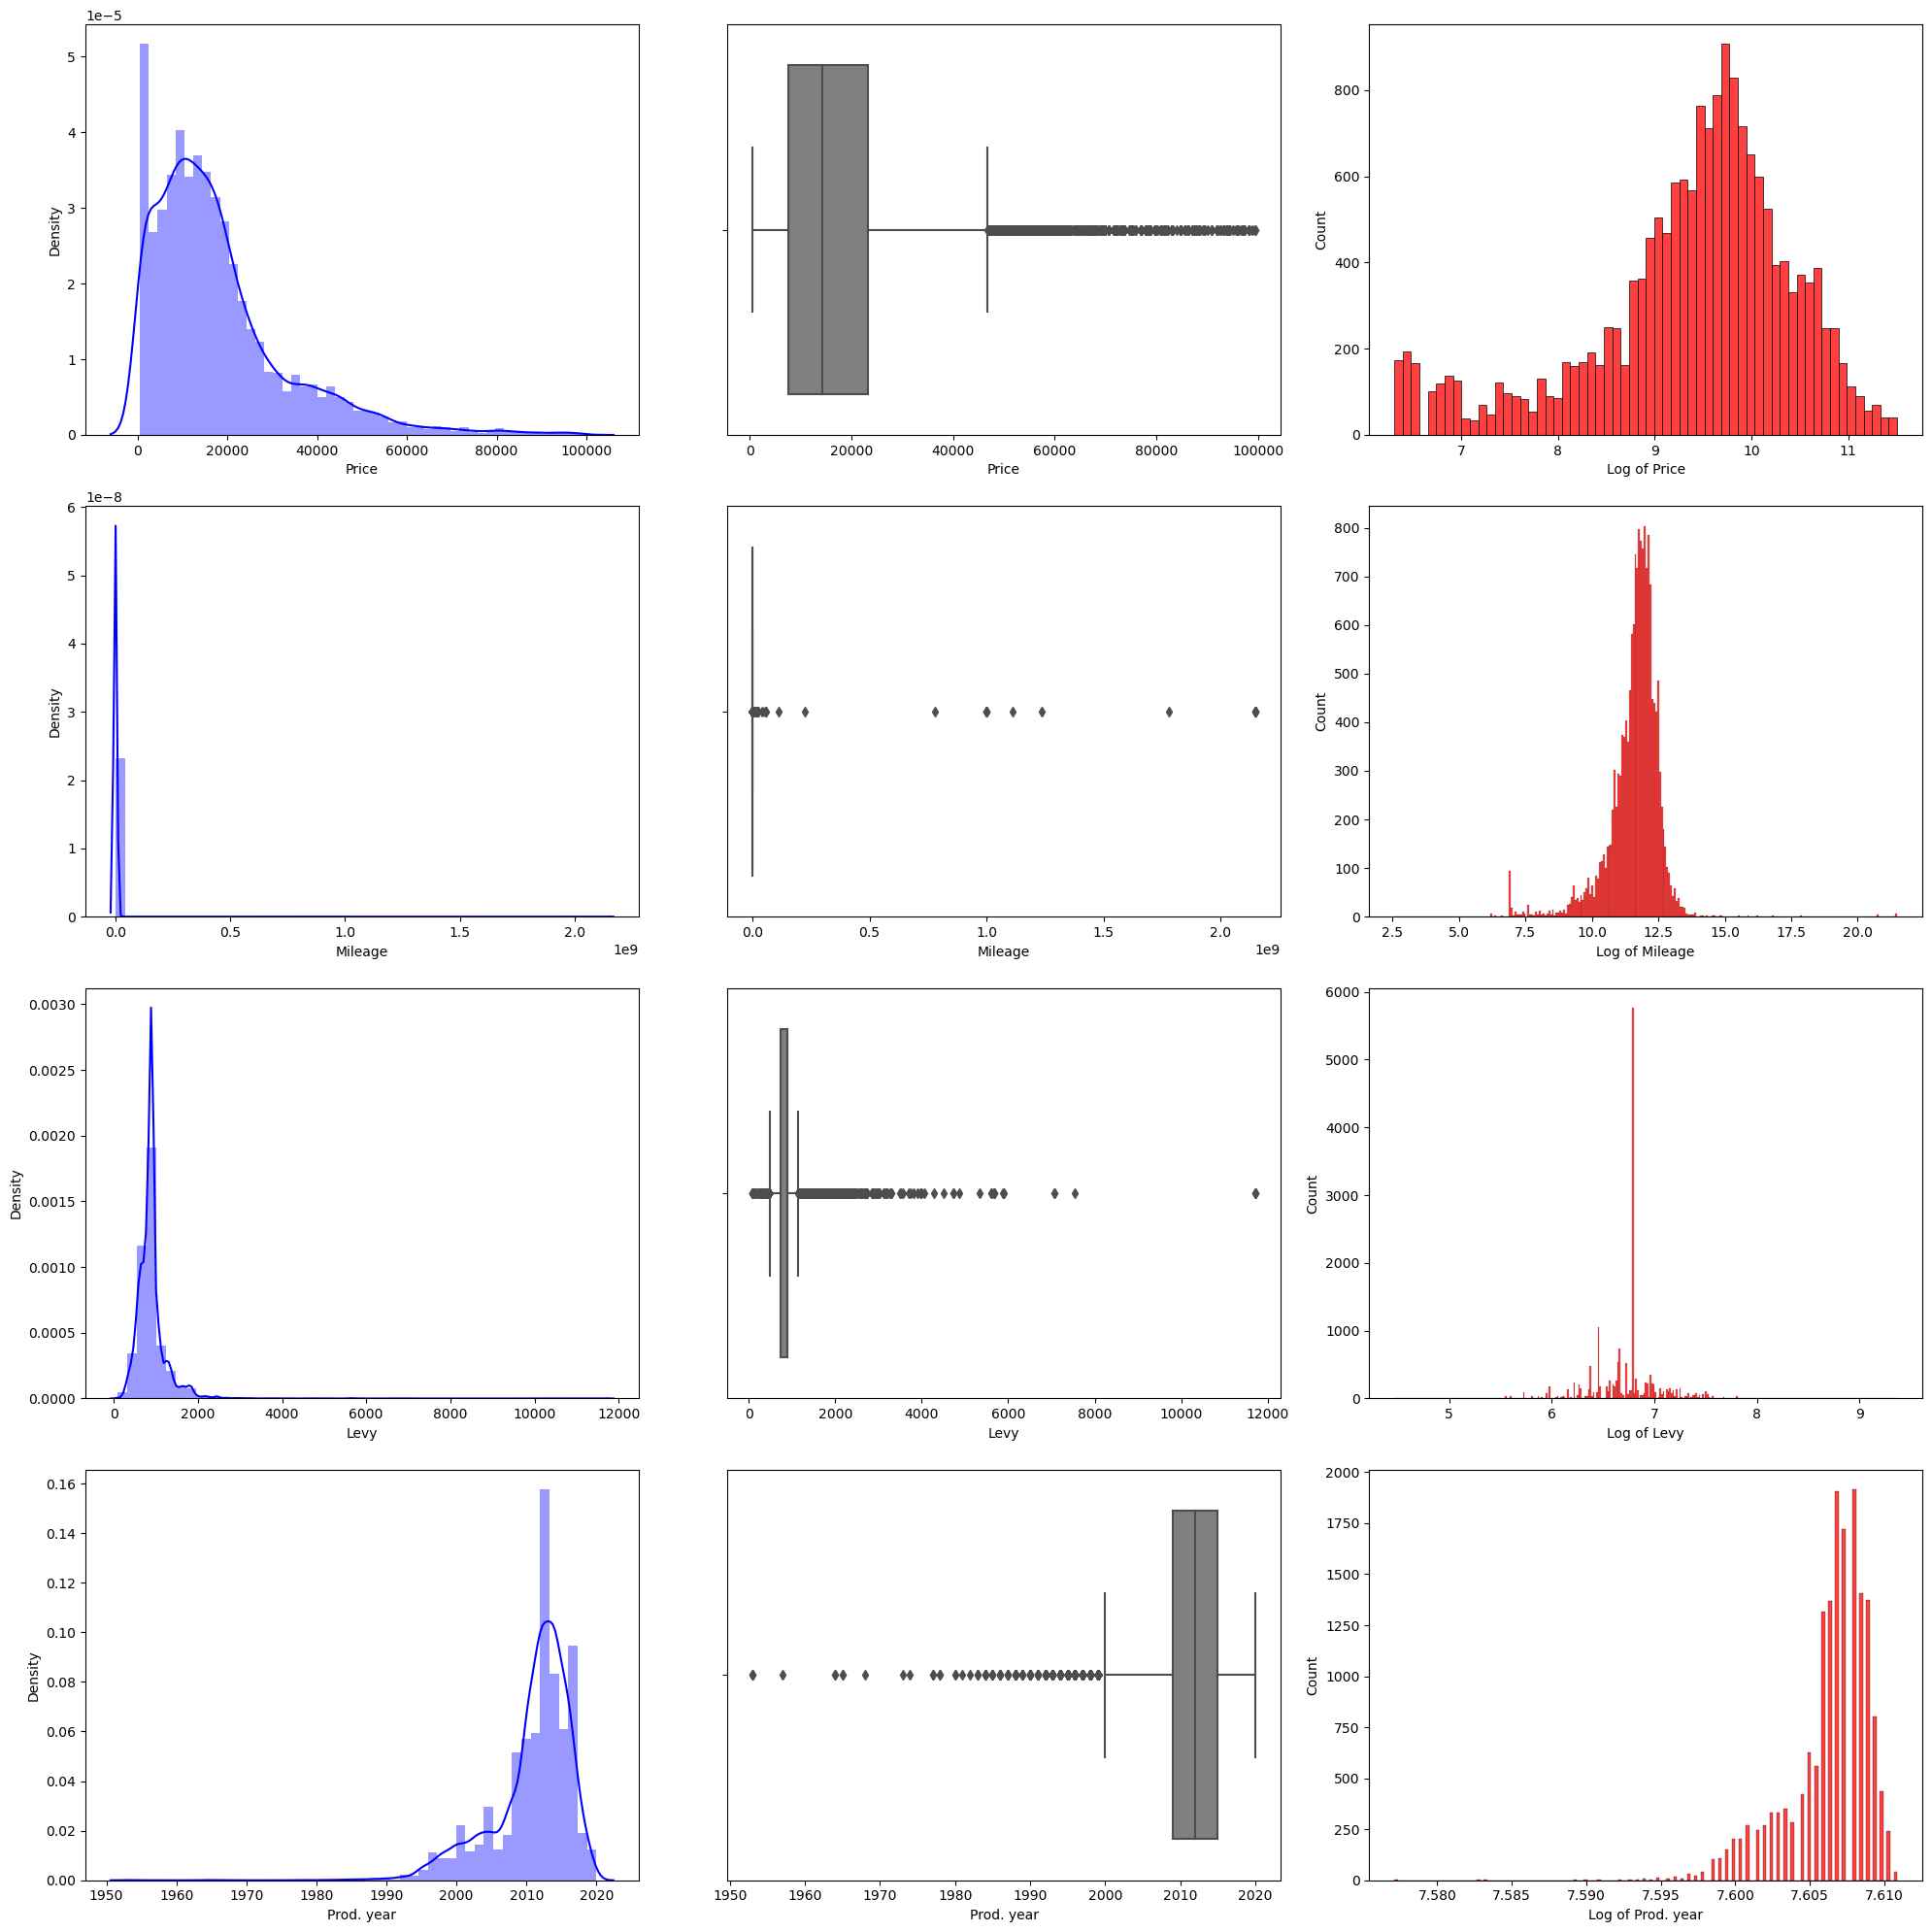

In [7]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (20,20))
columns = ['Price','Mileage','Levy','Prod. year']

for i,column in enumerate(columns):
    distPlot(column,i,0,'blue')
    boxPlot(column,i,1,'grey')
    histPlot(column,i,2,'red')
    axs[i,2].set_xlabel('Log of {}'.format(column))
    
plt.tight_layout()
plt.show()

In [8]:
def scattPlot(column,r,c,colr):
    sns.scatterplot(x = car[column], y = car['Price'], color = colr, ax = axs[r,c])
    
def kdePlot(column,r,c,colr):
    sns.kdeplot(x = car[column], y = car['Price'], shade = True, cmap = colr, ax = axs[r,c])

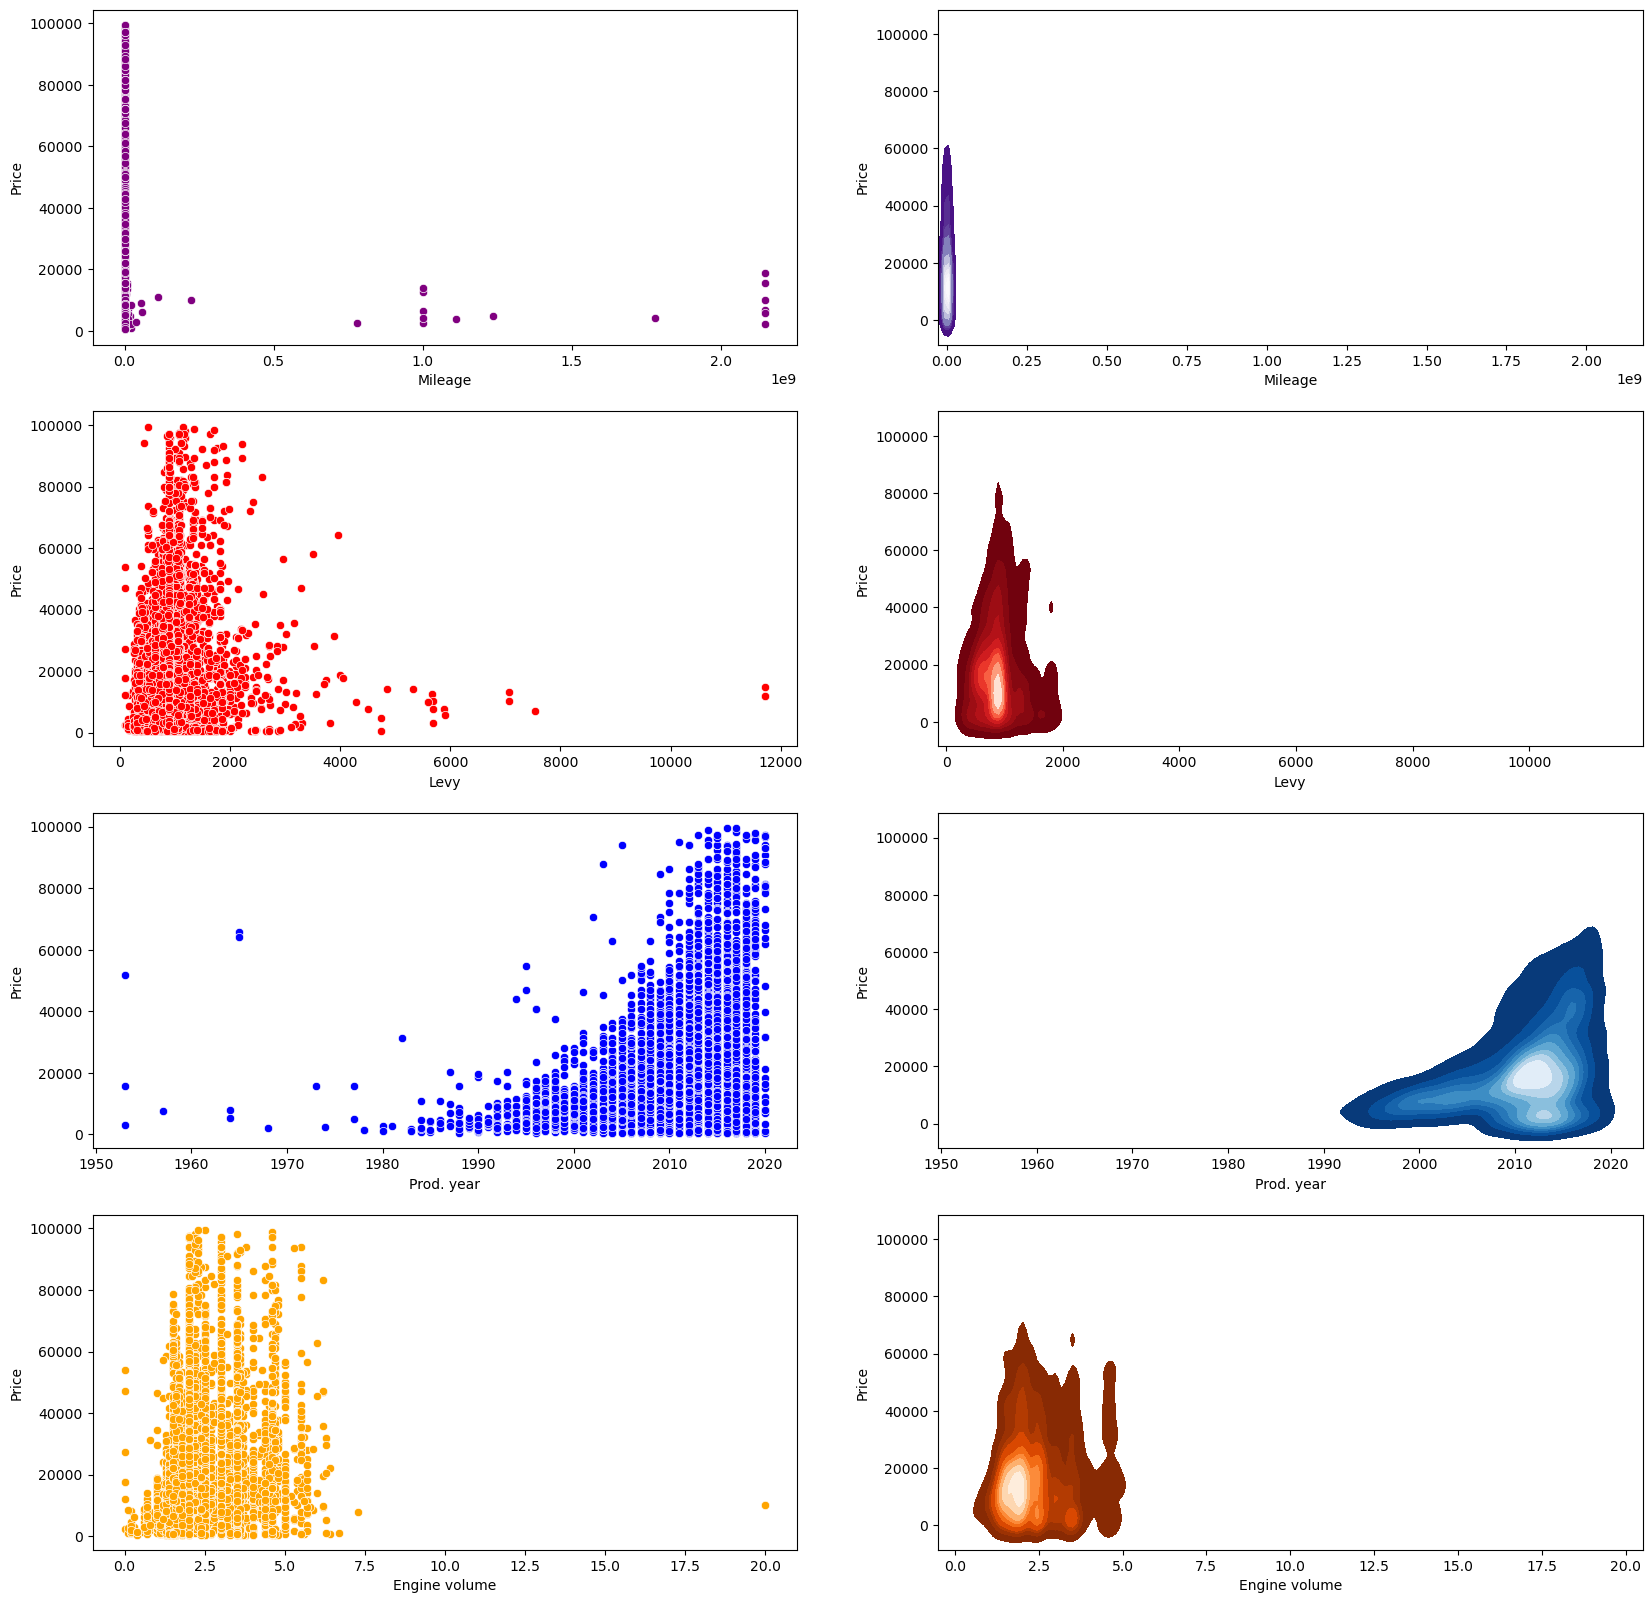

In [9]:
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (20,20))
columns = ['Mileage','Levy','Prod. year','Engine volume']
colors = ['purple', 'red', 'blue', 'orange']
colorsSeq = ['Purples_r', 'Reds_r', 'Blues_r', 'Oranges_r']

for i, column in enumerate(columns):
    scattPlot(column,i,0,colors[i])
    kdePlot(column,i,1,colorsSeq[i])
    
plt.show()

In [10]:
import plotly.express as px
production = car[['Manufacturer', 'Category', 'Cylinders']]
fig = px.sunburst(production, path = ['Manufacturer', 'Category'],
                 values = 'Cylinders', width = 950, height = 1000,
                 color = 'Cylinders', color_continuous_scale = 'IceFire',
                 title = "Cars Production with Cylinder Counts")

fig.show()


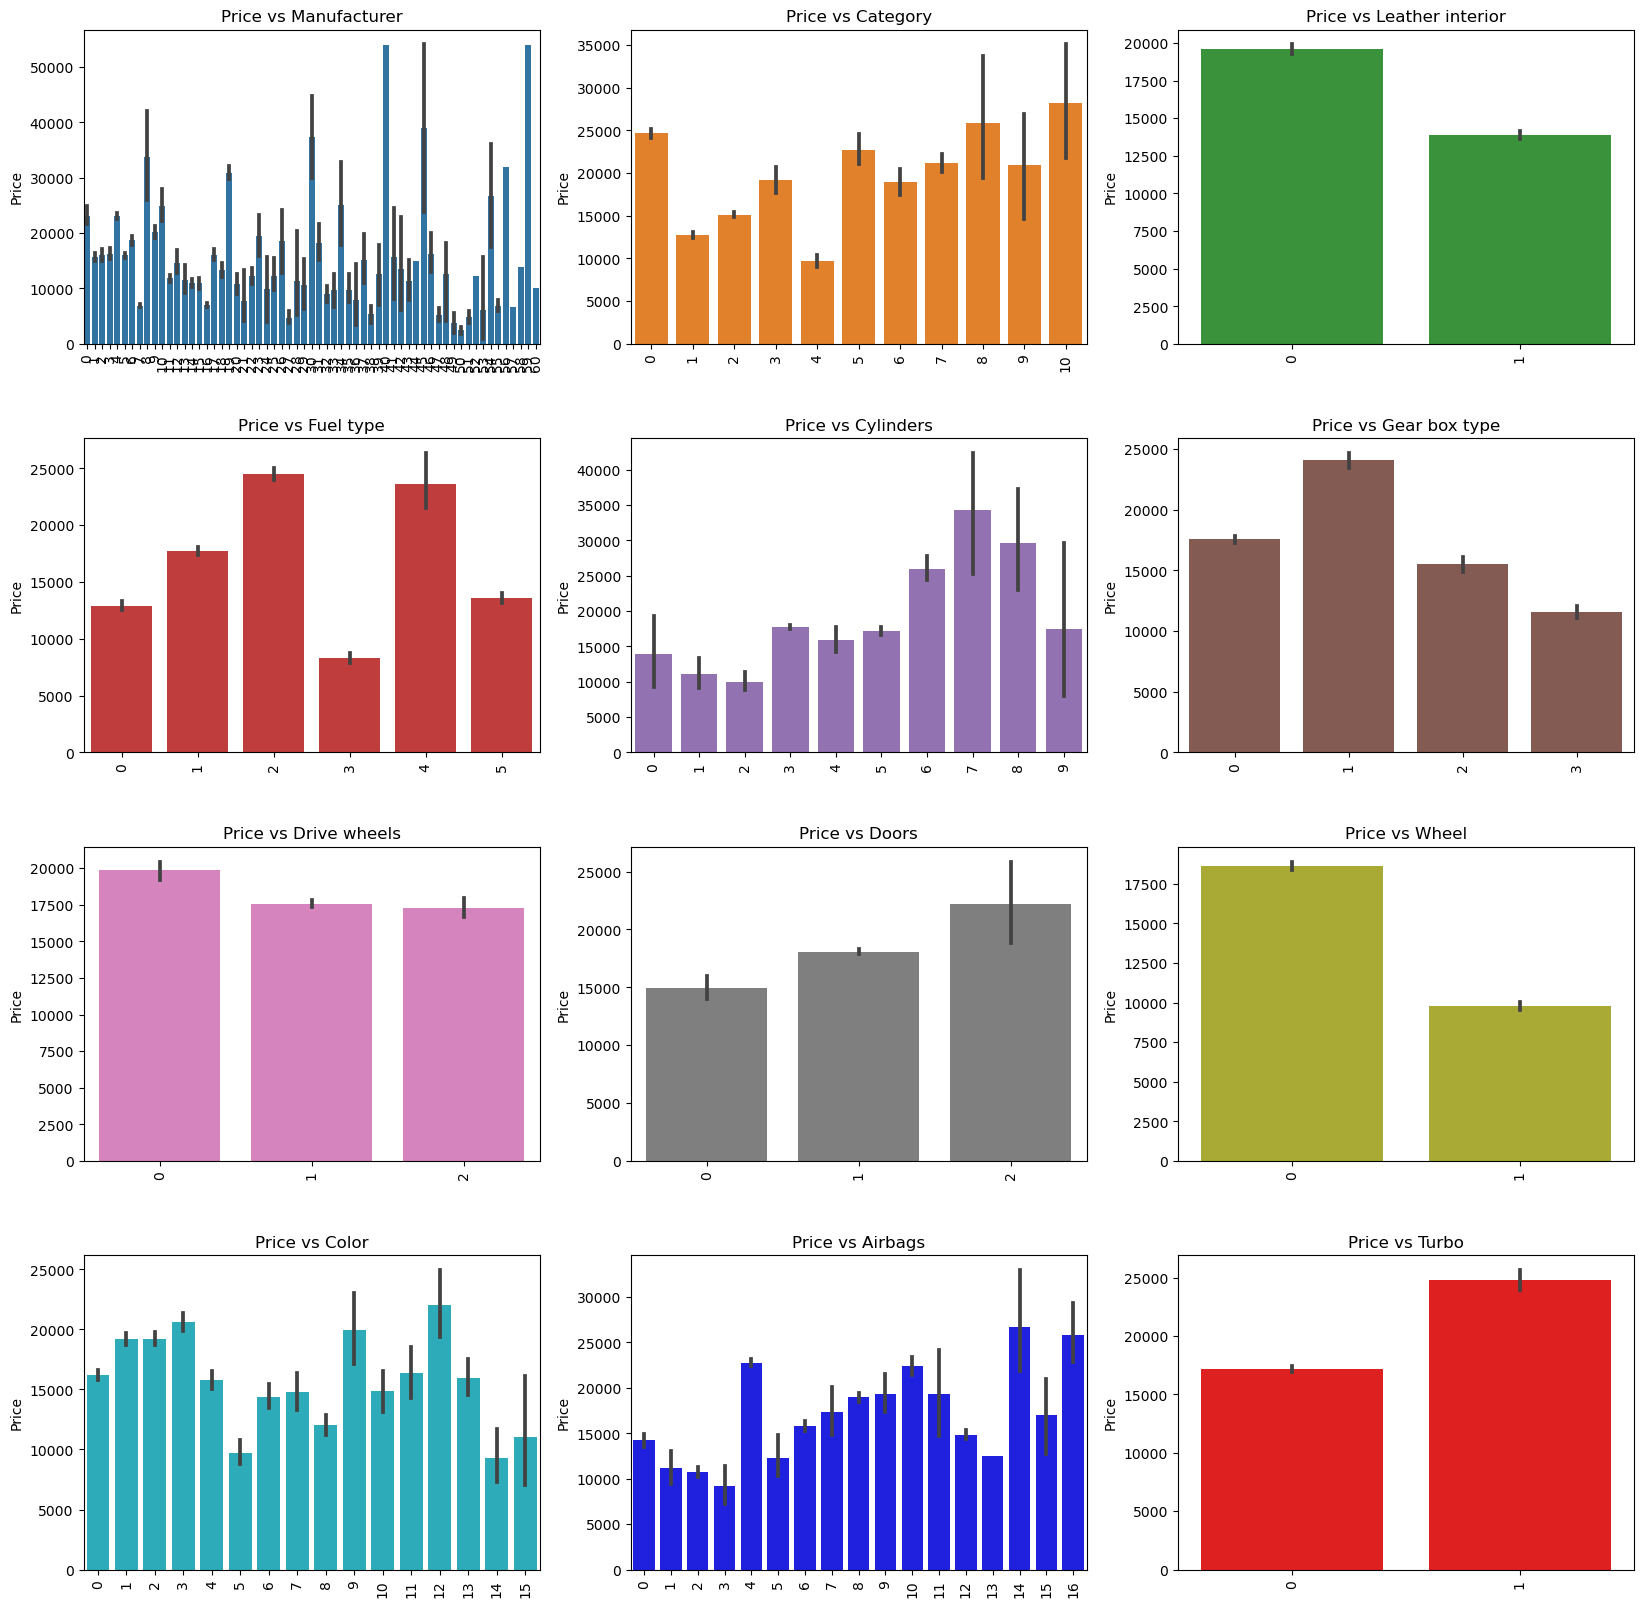

In [11]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (20,20))
fig.subplots_adjust(hspace = 0.3)
axs = axs.flatten() 
columns = ['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
           'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel',
           'Color', 'Airbags', 'Turbo']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
          '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'blue', 'red']

for i, column in enumerate(columns):
    sns.barplot(x = column, y = 'Price', data = car, ax = axs[i], palette = [colors[i]])
    axs[i].set_title(f'Price vs {column}')
    axs[i].set_xticklabels(axs[i].get_xticks(), rotation = 90)
    axs[i].set_xlabel('')

plt.show()

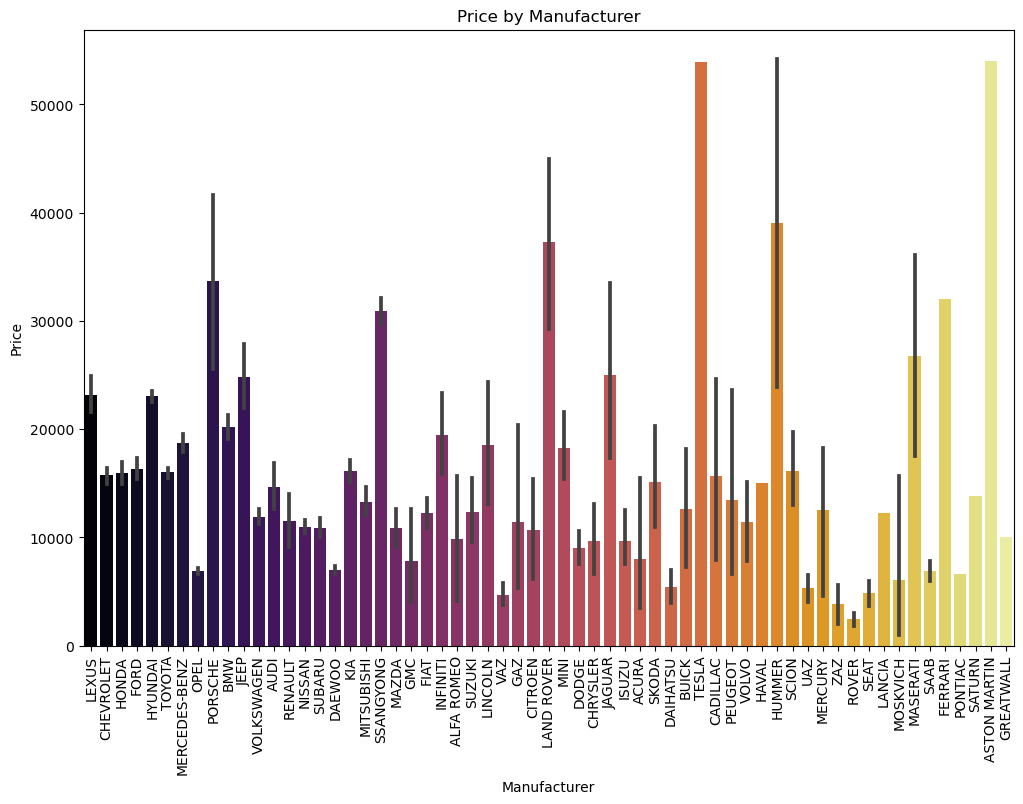

In [12]:
plt.figure(figsize=(12,8))
axs = sns.barplot(x = 'Manufacturer', y = 'Price', data = car, palette = 'inferno')
axs.set_xticklabels(axs.get_xticklabels(), rotation = 90)
plt.title('Price by Manufacturer')
plt.show()